In [1]:
import numpy as np

import pandas as pd
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
import ggplot

%matplotlib inline

In [2]:
red_wine = pd.read_csv('winequality-red.csv',sep=';')
white_wine = pd.read_csv('winequality-white.csv',sep=';')

In [3]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [4]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [5]:
y_red_wine = red_wine['quality']
x_red_wine = red_wine.drop('quality', 1)

In [6]:
x_red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [7]:
#scatter_matrix(x_red_wine, alpha=0.2, figsize=(12, 12), diagonal='kde')

Notes: There appears to be a collinearity between pH and fixed acidity and density and fixed acidity. I will drop fixed acidity. Also, there is collinearity between citric acid and volatile acid. I will drop citric acid.

In [8]:
abs(x_red_wine.max() - x_red_wine.mean()) / x_red_wine.std()

fixed acidity            4.353787
volatile acidity         5.876138
citric acid              3.742403
residual sugar           9.192806
chlorides               11.123555
free sulfur dioxide      5.365606
total sulfur dioxide     7.372847
density                  3.678904
pH                       4.526866
sulphates                7.916200
alcohol                  4.201138
dtype: float64

Residual sugar en chlorides show outliers. I will drop values above 8 standard deviations from the mean.

## Clean up the data

In [9]:
y_red_wine = red_wine['quality']
x_red_wine = red_wine.drop(['quality','fixed acidity','citric acid'], 1)

In [10]:
def outliers(df, threshold):
    for col in df.columns.values: 
        df[col][df[col] > float(threshold)*df[col].std()+df[col].mean()] = np.nan
    return df

In [11]:
x_red_wine_trim = x_red_wine.copy()

In [57]:
x_red_wine_trim = outliers(x_red_wine_trim, 5.)

In [58]:
(x_red_wine_trim.max() - x_red_wine.mean()) / x_red_wine.std()

volatile acidity        4.479955
residual sugar          4.440790
chlorides               3.878302
free sulfur dioxide     4.983202
total sulfur dioxide    3.603315
density                 3.678904
pH                      4.526866
sulphates               4.140544
alcohol                 4.201138
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14e3b1990>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x153169cd0>]], dtype=object)

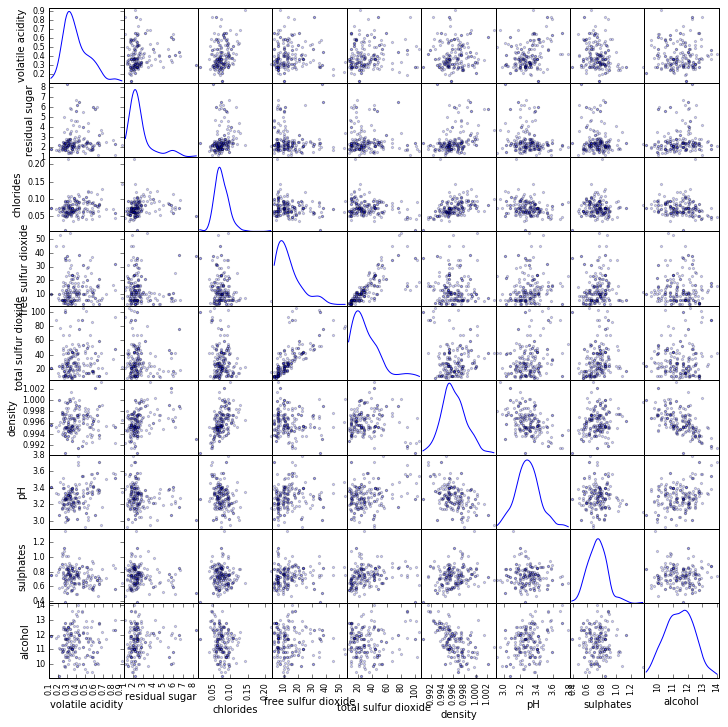

In [247]:
scatter_matrix(x_red_wine_trim[y_red_wine == 7], alpha=0.2, figsize=(12, 12), diagonal='kde')

In [60]:
x_red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
residual sugar,1599,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000
alcohol,1599,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000


In [61]:
x_red_wine_trim.describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1598,0.527162,0.177169,0.12000,0.3900,0.52000,0.640000,1.33000
residual sugar,1586,2.455769,1.055819,0.90000,1.9000,2.20000,2.600000,8.80000
chlorides,1577,0.082942,0.026141,0.01200,0.0700,0.07900,0.090000,0.27000
free sulfur dioxide,1598,15.839800,10.368688,1.00000,7.0000,14.00000,21.000000,68.00000
total sulfur dioxide,1597,46.170946,31.826498,6.00000,22.0000,38.00000,62.000000,165.00000
density,1599,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1591,0.652495,0.149350,0.33000,0.5500,0.62000,0.730000,1.36000
alcohol,1599,10.422983,1.065668,8.40000,9.5000,10.20000,11.100000,14.90000


In [63]:
x_red_wine_normalized = x_red_wine_trim / x_red_wine_trim.max()

In [91]:
x_red_wine_normalized = x_red_wine_normalized.fillna(0)

In [92]:
x_red_wine_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
volatile acidity,1599,0.396115,0.133536,0.000000,0.293233,0.390977,0.481203,1
residual sugar,1599,0.276796,0.122092,0.000000,0.215909,0.250000,0.295455,1
chlorides,1599,0.302967,0.102596,0.000000,0.259259,0.292593,0.329630,1
free sulfur dioxide,1599,0.232793,0.152544,0.000000,0.102941,0.205882,0.308824,1
total sulfur dioxide,1599,0.279474,0.193021,0.000000,0.133333,0.230303,0.375758,1
density,1599,0.993082,0.001880,0.986430,0.991940,0.993086,0.994167,1
pH,1599,0.825714,0.038500,0.683292,0.800499,0.825436,0.847880,1
sulphates,1599,0.477376,0.114655,0.000000,0.404412,0.455882,0.536765,1
alcohol,1599,0.699529,0.071521,0.563758,0.637584,0.684564,0.744966,1


In [82]:
print y_red_wine.shape, x_red_wine_normalized.shape

(1599,) (1599, 9)


## Prepare data for Tensor Flow

Determine number of categories:

In [17]:
red_wine_quality = np.sort(y_red_wine.unique())

In [242]:
print red_wine_quality

[3 4 5 6 7 8]


In [67]:
print 'Number of categories:',len(red_wine_quality)

Number of categories: 6


In [68]:
num_categories = len(red_wine_quality)

Determine number of features:

In [71]:
print 'Number of features:',x_red_wine_normalized.shape[1]

Number of features: 9


In [73]:
num_features = x_red_wine_normalized.shape[1]

### Define placeholders

In [75]:
y_red_wine_list = y_red_wine.tolist()

In [78]:
batch_size = len(y_red_wine_list)

In [79]:
features_placeholder = tf.placeholder(tf.float32, shape=(batch_size, num_features))

### Build the graph

In [80]:
# Hidden Layer 1
with tf.name_scope('hidden1'):
    weights = tf.Variable(
        tf.truncated_normal([num_features, hidden1_units],
                            stddev=1.0 / math.sqrt(float(num_features))),
        name='weights')
    biases = tf.Variable(tf.zeros([hidden1_units]),
                         name='biases')
    hidden1 = tf.nn.relu(tf.matmul(features_placeholder, weights) + biases)

NameError: name 'hidden1_units' is not defined

### Convert y-labels to one hot vectors

In [56]:
print batch_size

Tensor("Size_3:0", shape=TensorShape([]), dtype=int32)


In [47]:
num_classes = tf.size(red_wine_quality)

In [42]:
y_red_wine_list = tf.expand_dims(y_red_wine_list,1)

In [43]:
indices = tf.expand_dims(tf.range(0,batch_size,1),1)

In [45]:
concated = tf.concat(1,[indices,y_red_wine_list])

In [48]:
y_red_wine_onehot = tf.sparse_to_dense(concated, tf.pack([batch_size,num_classes]), 1.0, 0.0)

In [49]:
print y_red_wine_onehot

Tensor("SparseToDense:0", shape=TensorShape([Dimension(None), Dimension(None)]), dtype=float32)


Split the data into test and train datasets.

In [23]:
y_red_wine_train = y_red_wine_list_oh[0:1438]

In [24]:
y_red_wine_test = y_red_wine_list_oh[1438:]

In [25]:
x_red_wine_train = x_red_wine_trim[0:1438]

In [26]:
x_red_wine_test = x_red_wine_trim[1438:]

Define the model:

In [27]:
import tensorflow as tf

In [28]:
print x_red_wine_train.shape

(1438, 9)


In [29]:
print y_red_wine_train.shape

(1438, 6)


In [30]:
x = tf.placeholder(tf.float32, [None, 10])

In [31]:
W = tf.Variable(tf.zeros([10,6]))

In [32]:
b = tf.Variable(tf.zeros([6]))

In [33]:
y = tf.nn.softmax(tf.matmul(x, W) + b)
#y = tf.matmul(x_red_wine_train,W) + b

Train the model:

In [34]:
y_ = tf.placeholder(tf.float32, [None, 6])

In [35]:
cross_entropy = -tf.reduce_sum(y_*tf.log(y))
#loss = tf.reduce_mean(ts.square(y - y_red_wine_train))

In [36]:
train_step = tf.train.GradientDescentOptimizer(.001).minimize(cross_entropy)

In [37]:
init = tf.initialize_all_variables()

In [38]:
sess = tf.Session()
sess.run(init)

In [39]:
from input_data import *

In [40]:
for i in range(100):
  batch_xs, batch_ys = x_red_wine_train.next_batch(10)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

AttributeError: 'DataFrame' object has no attribute 'next_batch'

Evaluate the model:

In [ ]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))

In [ ]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [ ]:
print(sess.run(accuracy, feed_dict={x: x_red_wine_test, y_: y_red_wine_test}))

## Using scikit learn

In [98]:
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [93]:
y_red_wine = y_red_wine.fillna(0)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(x_red_wine_normalized, y_red_wine, test_size=0.2, random_state=42)

In [95]:
lr = LogisticRegression()

In [96]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [99]:
print accuracy_score(lr.predict(X_test), y_test)

0.559375


## Using skflow

In [111]:
import skflow
import random
from sklearn import datasets, metrics

In [101]:
random.seed(42)

In [229]:
classifier = skflow.TensorFlowLinearClassifier(n_classes=9)

In [230]:
classifier.fit(X_train[0:1250].as_matrix(), y_train[0:1250].as_matrix())

Step #1, avg. loss: 3.76944
Step #6, avg. loss: 3.09473
Step #11, avg. loss: 2.38231
Step #16, avg. loss: 1.87300
Step #21, avg. loss: 1.67501
Step #26, avg. loss: 1.57187
Step #31, avg. loss: 1.35910
Step #36, avg. loss: 1.34118
Step #41, avg. loss: 1.33888
Step #46, avg. loss: 1.21590


TensorFlowLinearClassifier(batch_size=32, continue_training=False,
              learning_rate=0.1, n_classes=9, optimizer='SGD', steps=50,
              tf_master='', tf_random_seed=42)

In [112]:
iris = datasets.load_iris()

In [133]:
iris.target.shape, iris.data.shape

((150,), (150, 4))

In [124]:
np.sort(y_train.unique())

array([3, 4, 5, 6, 7, 8])

In [218]:
y_train[0:1250].as_matrix().shape, X_train[0:1250].as_matrix().shape

((1250,), (1250, 9))

In [210]:
classifier = skflow.TensorFlowLinearClassifier(n_classes=2)

In [211]:
classifier.fit(iris.data, iris.target)

IndexError: index 2 is out of bounds for axis 1 with size 2

In [202]:
score = metrics.accuracy_score(iris.target, classifier.predict(iris.data))

In [203]:
print("Accuracy: %f" % score)

Accuracy: 0.653333


In [164]:
iris.data.shape

(150, 4)

In [189]:
iris.target.shape

(150,)

In [163]:
x_red_wine_normalized.shape, y_red_wine.shape

((1599, 9), (1599,))

In [231]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

## Tensor Flow

In [ ]:
import tensorflow as tf

In [ ]:
X = tf.placeholder("float",[None,1])
Y = tf.placeholder("float",[None,3])

In [ ]:
W = tf.Variable(tf.random_normal([1,3],stddev=0.01))